#                                        Sales Data Analysis

Problem Statment

 1: The Superstore dataset provides sales and profit data for a variety of products across different categories and regions.
 2: The goal of this project is to analyze the data and identify insights that can help the company improve its business             performance. 
 3: Specifically, we aim to answer questions such as: which product categories are the most profitable? Which regions have the       highest sales and profit? What are the most profitable products? 
 4: By answering these questions, we hope to provide recommendations for the company on how to optimize its product offerings       and improve its revenue and profitability.


In [65]:
#importing usefull libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Gathering and Cleaning Data

In [12]:
df=pd.read_csv(r"data/superstore_dataset2011-2015.csv",encoding="ISO-8859-1")

# Exploring Data

In [13]:
#just looking first 10 values to get idea of data

df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


In [14]:
#Lets check columns available

df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [15]:
df.shape

#shows how many rows and columns available

(51290, 24)

In [17]:
df.info()

#this gives information about dataset and shows postal code columns has some  missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [18]:
#Lets check missing values

df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [21]:
#Lets check duplicated values

df.duplicated().any()


False

In [22]:
#Lets get overall statistics of Dataframe

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [27]:
#Lets drop columns which we dont need

df.drop(['Row ID', 'Order ID',"Customer ID","Postal Code"],axis=1)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


# Now that cleaning is done we will check our hypothesis 

Hypothesis 1: Technology products have the highest profit margin compared to other product categories.

Hypothesis 2: The East region has the highest sales compared to other regions.

Hypothesis 3: Sales are higher during certain months of the year.

Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products.

Hypothesis 5: The company's profit is more on weekdays than on weekends.


In [29]:
#Hypothesis 1: Technology products have the highest profit margin compared to other product categories

cat_profit= df.groupby("Category")["Profit"].sum()
cat_profit

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

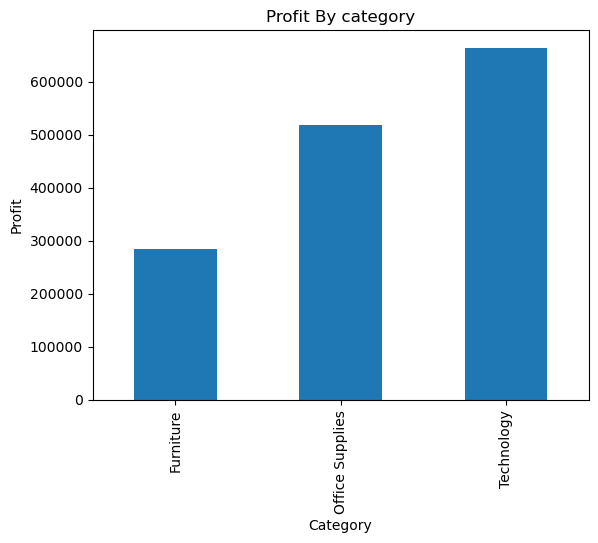

In [31]:
#It shows Technology products have more sales.we can even exlopre by plot

cat_profit.plot(kind="bar")
plt.title("Profit By category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

#So Our hypothesis was right

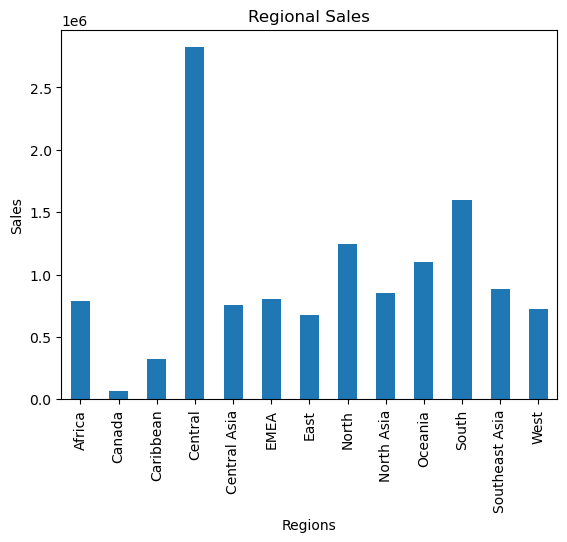

In [34]:
#Hypothesis 2: The East region has the highest sales compared to other regions

Regional_sales=df.groupby("Region")["Sales"].sum()
Regional_sales.plot(kind="bar")
plt.title("Regional Sales")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

#the hypothesis is not true as central region has more sales

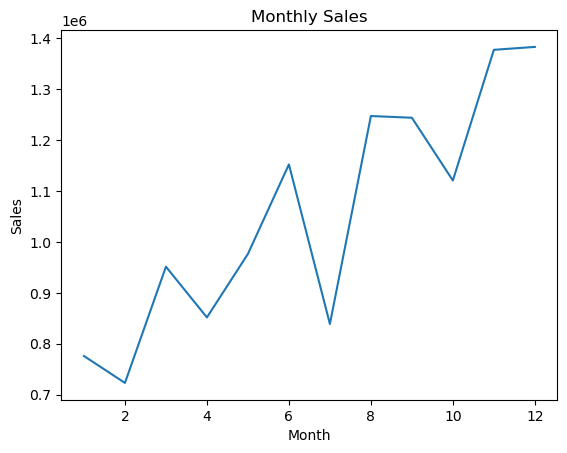

In [42]:
#Hypothesis 3: Sales are higher during certain months of the year
#we have to extract month from order date

df["Order Month"]=pd.DatetimeIndex(df["Order Date"]).month
Monthly_sales = df.groupby("Order Month")["Sales"].sum()

#Lets plot line plot
Monthly_sales.plot(kind="line")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

#It clearly says that yes sales are higher in certain months i.e December

In [46]:
#Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products

totalorder_shipMode=df.groupby("Ship Mode").size()
lessprofit_items_size=df[df["Profit"]<0].groupby("Ship Mode").size()
percentage_of_lessprofit_items=(lessprofit_items_size/totalorder_shipMode)*100
print(percentage_of_lessprofit_items)

Ship Mode
First Class       25.076616
Same Day          23.917068
Second Class      24.076050
Standard Class    24.480910
dtype: float64


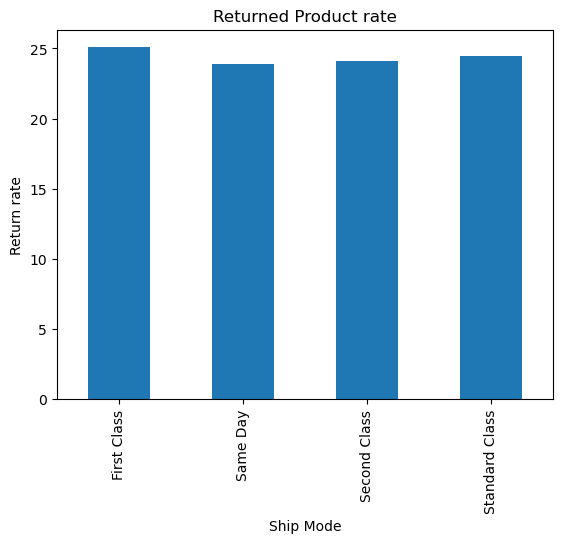

In [48]:
#Lets Plot it

percentage_of_lessprofit_items.plot(kind="bar")
plt.title("Returned Product rate")
plt.xlabel("Ship Mode")
plt.ylabel("Return rate")
plt.show()

#SO same day shipped products have less returned rate

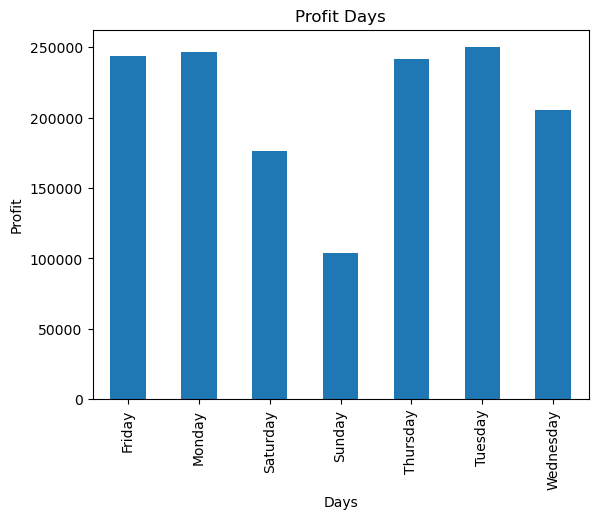

In [66]:
# Hypothesis 5: The company's profit is more on weekdays than on weekends

#first extract dayname
df["Order Day"]=pd.DatetimeIndex(df["Order Date"]).day_name()
Day_profit= df.groupby("Order Day")["Profit"].sum()
Day_profit.plot(kind="bar")
plt.title("Profit Days")
plt.xlabel("Days")
plt.ylabel("Profit")
plt.show()

In [ ]:
#SO it proves that profit is more on week days

# Conclusion

 > Based on the analysis, it can be concluded that technology products have the highest profit margin compared to other product    categories. 
 > The company's profit is higher on weekdays than on weekends. Sales are higher during certain months of the year. 
 > Orders with same-day shipping have the lowest rate of returned products. However, the hypothesis that the East region has the    highest sales compared to other regions is not supported by the data. 
 > These conclusions provide valuable insights into the company's performance and can guide future decision-making processes. 
 > It is important to note that further investigation may be required to fully understand the underlying factors influencing        these observations